# Seyed Mohammad Amin Atyabi - 830402014 - HW 1

در این تمرین به پیاده سازی چهار الگوریتم جست و جو گراف با و بدون استفاده از لیست گره های ملاقات شده پرداختیم.

فایل داده ورودی حاوی ماتریس همسایگی و اولیت انتخاب است.

هر چهار الگوریتم در یک تابع پیاده سازی شده و هیچ کدام به صورت بازگشتی پیاده سازی نشده اند.

In [1]:
from scipy import io as sio

node_connections = sio.loadmat('ConnectionMatrix.mat')
node_connections.keys()

dict_keys(['__header__', '__version__', '__globals__', 'NodeConnections', 'Heuristic'])

In [2]:
connection = node_connections.get('NodeConnections').A
connection

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
heuristic = node_connections.get('Heuristic')
heuristic

array([[  3,   2,   3,   2,   3,   3,   3,   3,   4,   3,   2,   3,   4,
          3,   3,   3,   4,   4,   3,   0,   3,   2,   4,   3,   3,   3,
          3,   2,   4,   3,   3,   2,   3,   3,   3,   3,   1,   5,   3,
          2,   3,   2,   3,   3,   4,   2,   2,   4,   3,   3,   5,   4,
          3,   5,   2,   3,   5,   3,   4,   4,   2,   4,   1,   3,   4,
          2,   4,   3,   2,   2,   2,   4,   3,   4, 100,   3,   3,   3,
          2,   2,   3,   2,   4,   3,   2,   3,   3,   2,   3,   4,   3,
          3,   3,   4,   3,   1,   1,   4,   3,   3]], dtype=uint8)

شکل زیر شماتیکی از ماتریس ورودی است

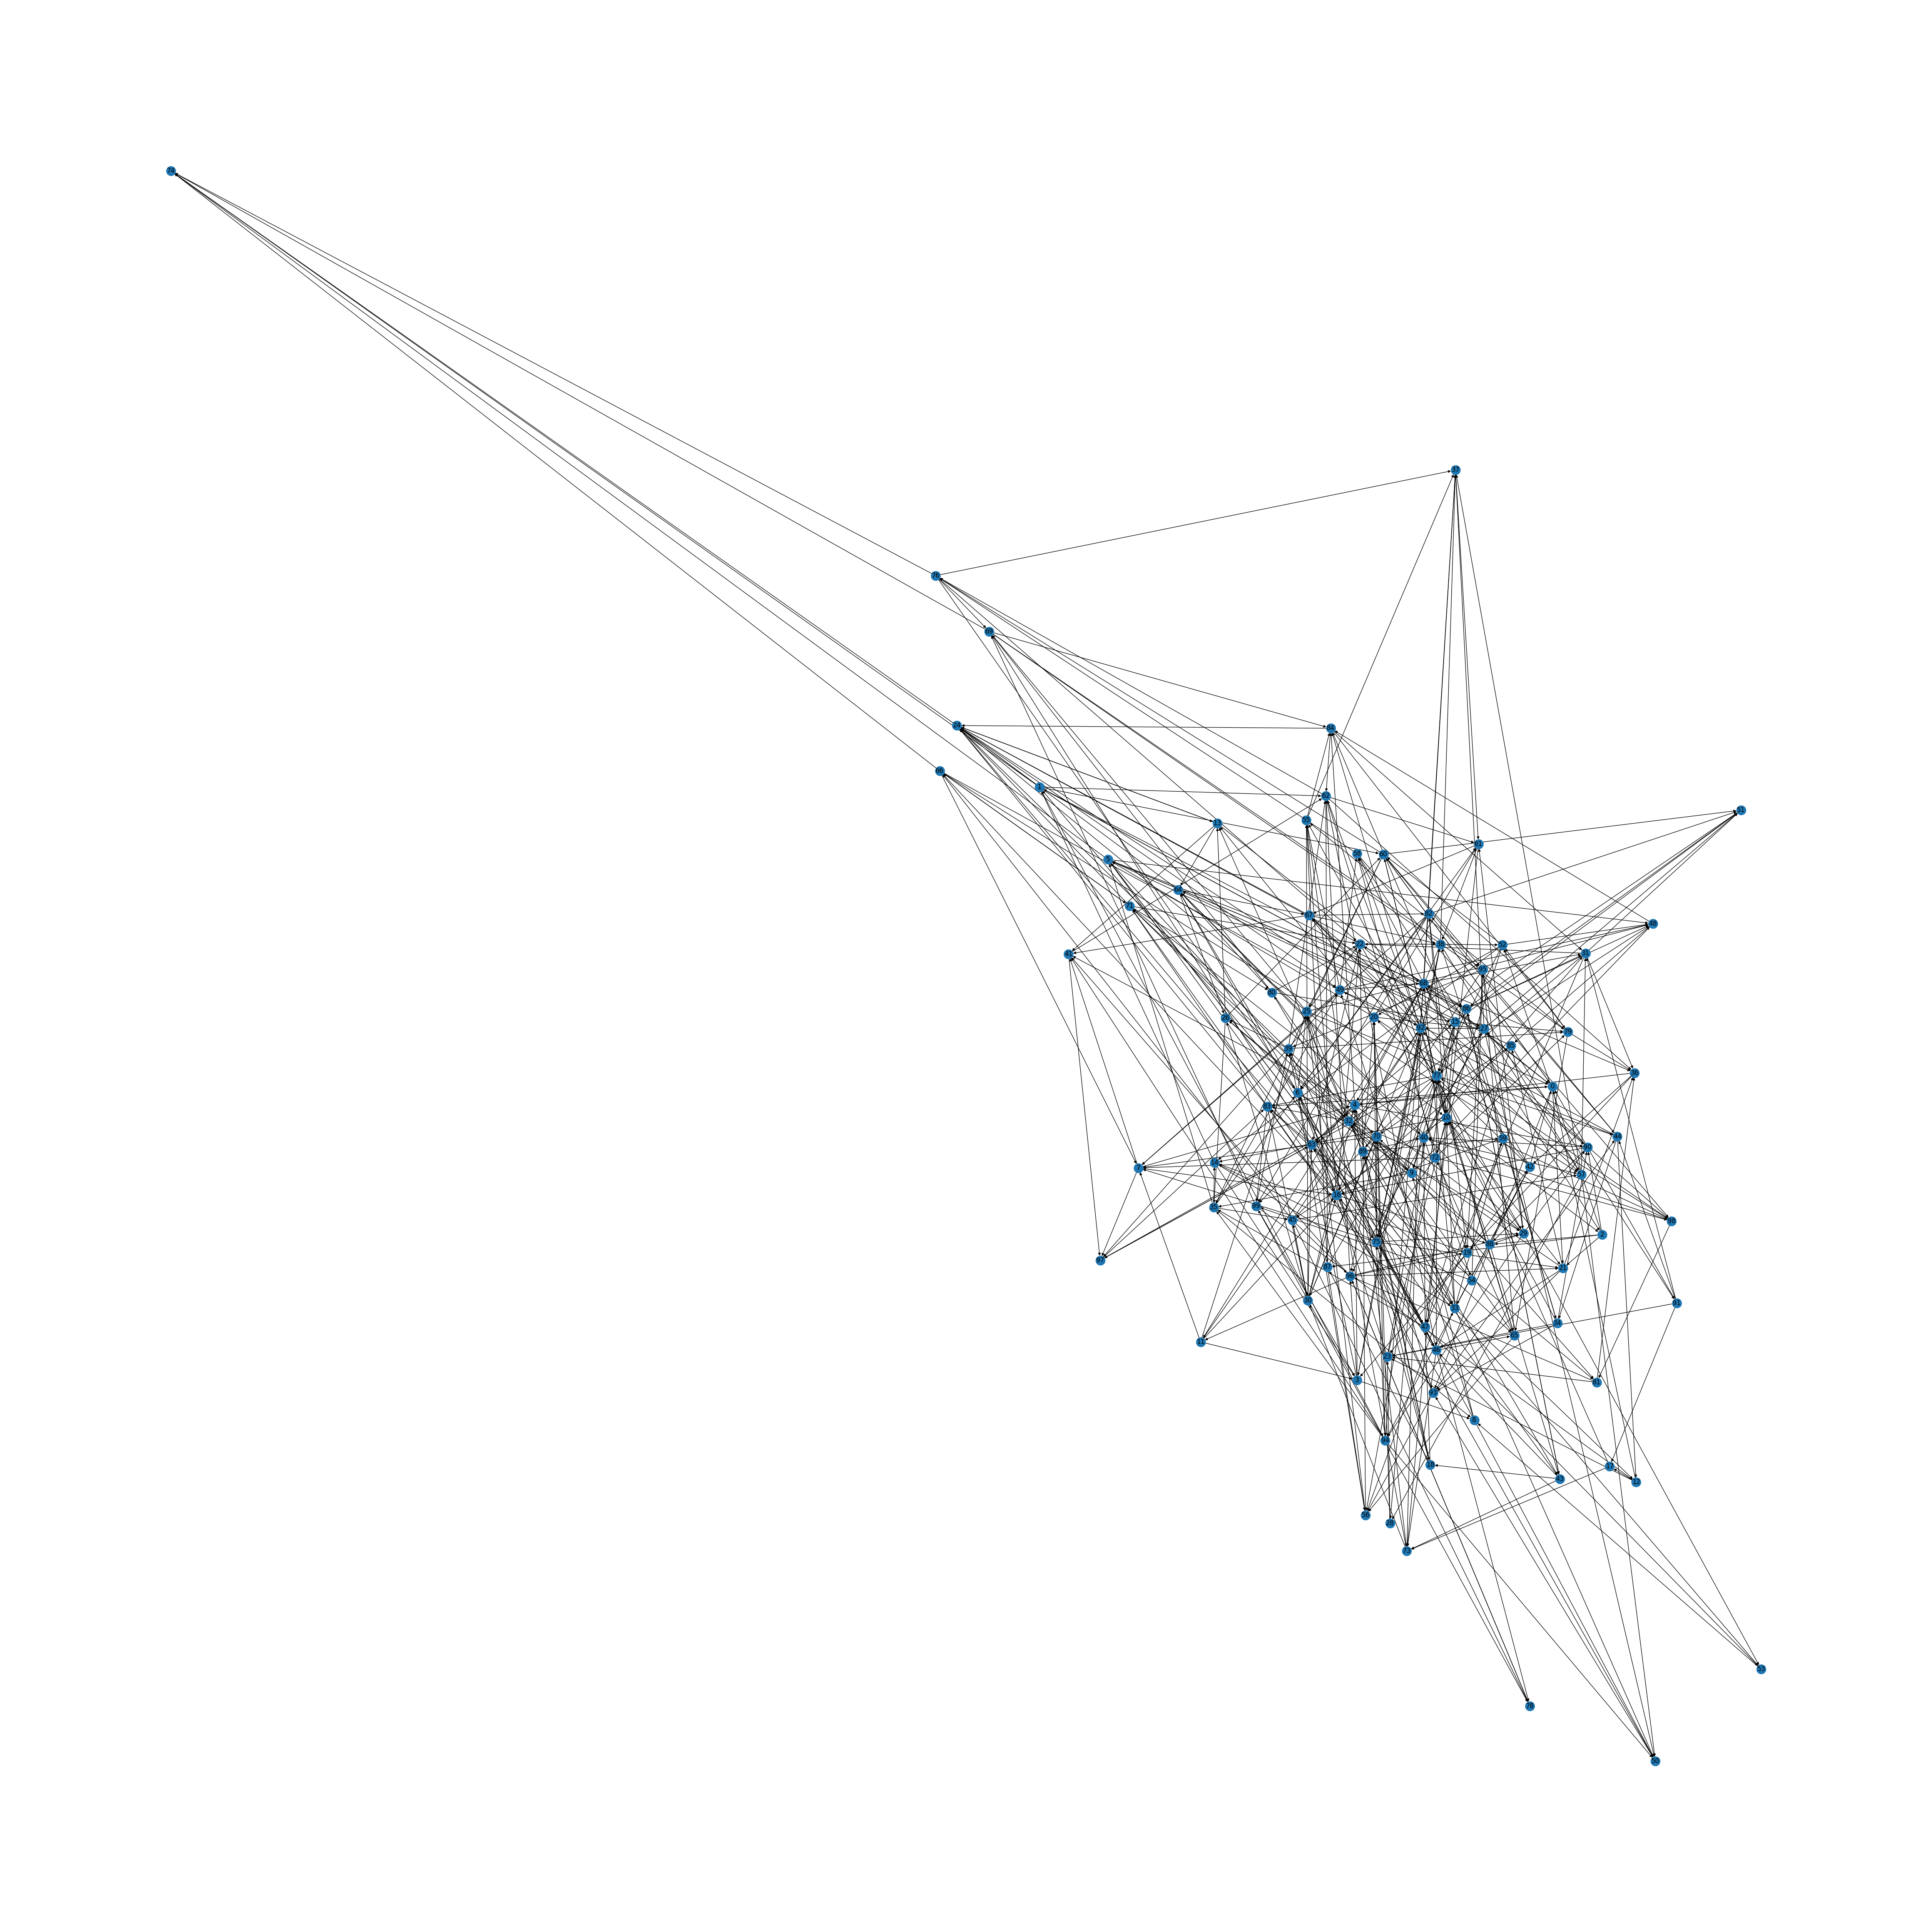

In [4]:
import numpy
import networkx
from matplotlib import pyplot

pyplot.figure(figsize=(50, 50))

G = networkx.from_numpy_array(numpy.matrix(connection), create_using=networkx.DiGraph)
networkx.draw(G, with_labels=True)
pyplot.show()

In [5]:
import operator

ALGORITHM_BFS = 0
ALGORITHM_DFS = 1
ALGORITHM_BEST_FIRST = 2
ALGORITHM_IDS = 3

DEPTH_LIMIT = 99


def backtrace(parent, start, goal, limit):
    path = [goal]
    while path[-1] != start:
        path.append(parent[path[-1]])
        if len(path) >= limit:
            return None
    path.reverse()
    return path


def search(adj_mat, start, goal, algorithm, use_visited, heuristic=None):
    visited = set()
    queue = [(start, 1)]
    time_complexity = 0
    space_complexity = 0
    if (algorithm == ALGORITHM_BFS) or (algorithm == ALGORITHM_BEST_FIRST):
        parent = {}
        while queue:
            for node in map(operator.itemgetter(0), queue):
                if use_visited:
                    if node in visited:
                        continue
                    visited.add(node)
                    space_complexity = max((space_complexity, len(visited), len(queue)))
                if node == goal:
                    print(f'Time complexity = {time_complexity}')
                    print(f'Space complexity = {space_complexity}')
                    return backtrace(parent, start, goal, DEPTH_LIMIT)
                else:
                    if backtrace(parent, start, node, DEPTH_LIMIT) is None:
                        print(f'Time complexity = {time_complexity}')
                        print(f'Space complexity = {space_complexity}')
                        return
            new_queue = []
            for node in map(operator.itemgetter(0), queue):
                for i in (adj_mat[node] == 1).nonzero()[-1]:
                    if algorithm == ALGORITHM_BFS:
                        new_queue.append((i, 1))
                    elif algorithm == ALGORITHM_BEST_FIRST:
                        new_queue.append((i, heuristic[i]))
                    if not parent.get(i):
                        parent[i] = node
            if algorithm == ALGORITHM_BFS:
                new_queue = sorted(new_queue, key=lambda x: x[0])
            elif algorithm == ALGORITHM_BEST_FIRST:
                new_queue = sorted(new_queue, key=lambda x: x[1])
            time_complexity += len(new_queue)
            space_complexity = max((space_complexity, len(visited), len(queue)))
            queue = new_queue
    elif (algorithm == ALGORITHM_DFS) or (algorithm == ALGORITHM_IDS):
        for depth in range(1, DEPTH_LIMIT):
            visited = set()
            visited.add(start)
            stack = [[start]]
            while stack:
                path = stack.pop()
                current = path[-1]
                if current == goal:
                    print(f'Time complexity = {time_complexity}')
                    print(f'Space complexity = {space_complexity}')
                    return path
                if (len(path) >= depth) and (algorithm == ALGORITHM_IDS):
                    continue
                for i in (adj_mat[current] == 1).nonzero()[-1]:
                    if i in visited:
                        continue
                    visited.add(i)
                    new_path = list(path)
                    new_path.append(i)
                    stack.append(new_path)
                    time_complexity += 1
                    space_complexity = max((space_complexity, len(visited), len(queue)))
        print(f'Time complexity = {time_complexity}')
        print(f'Space complexity = {space_complexity}')
        return None

**اجرا الگوریتم اول سطح با استفاده از لیست ملاقات شده**

In [6]:
print(f'Route: {search(connection, 1, 20, ALGORITHM_BFS, True)}')

Time complexity = 203
Space complexity = 163
Route: [1, 86, 75, 20]


**اجرا الگوریتم اول سطح بدون استفاده از لیست ملاقات شده**

In [7]:
print(f'Route: {search(connection, 1, 20, ALGORITHM_BFS, False)}')

Time complexity = 203
Space complexity = 33
Route: [1, 86, 75, 20]


**اجرا الگوریتم اول عمق با استفاده از لیست ملاقات شده**

In [8]:
print(f'Route: {search(connection, 1, 20, ALGORITHM_DFS, True)}')

Time complexity = 99
Space complexity = 100
Route: [1, 94, 75, 20]


**اجرا الگوریتم اول عمق بدون استفاده از لیست ملاقات شده**

In [9]:
print(f'Route: {search(connection, 1, 20, ALGORITHM_DFS, False)}')

Time complexity = 99
Space complexity = 100
Route: [1, 94, 75, 20]


**اجرا الگوریتم اول بهترین با استفاده از لیست ملاقات شده**

In [10]:
print(f'Route: {search(connection, 1, 20, ALGORITHM_BEST_FIRST, True, heuristic[0])}')

Time complexity = 203
Space complexity = 163
Route: [1, 86, 75, 20]


**اجرا الگوریتم اول بهترین بدون استفاده از لیست ملاقات شده**

In [11]:
print(f'Route: {search(connection, 1, 20, ALGORITHM_BEST_FIRST, False, heuristic[0])}')

Time complexity = 203
Space complexity = 33
Route: [1, 86, 75, 20]


**اجرا الگوریتم تناوبی وابسته با استفاده از لیست ملاقات شده**

In [12]:
print(f'Route: {search(connection, 1, 20, ALGORITHM_IDS, True)}')

Time complexity = 61
Space complexity = 33
Route: [1, 94, 75, 20]


**اجرا الگوریتم تناوبی وابسته بدون استفاده از لیست ملاقات شده**

In [13]:
print(f'Route: {search(connection, 1, 20, ALGORITHM_IDS, False)}')

Time complexity = 61
Space complexity = 33
Route: [1, 94, 75, 20]


در هر مرحله اجرا، مرتبه زمانی و فضایی هر کدام یک از الگوریتم ها چاپ شده است.

نتایج این اجرا ها در جدول زیر آورده شده است:

|          Algorithm           | Time Complexity | Space Complexity |
|:----------------------------:|:---------------:|:----------------:|
|             BFS              |       203       |       163        |
|    BFS (without visited)     |       203       |        33        |
|             DFS              |       99        |       100        |
|    DFS (without visited)     |       99        |       100        |
|          Best-First          |       203       |       163        |
| Best-First (without visited) |       203       |        33        |
|             IDS              |       61        |        33        |
|    IDS (without visited)     |       61        |        33        |

برای نمایش مرتبه زمانی و فضا تعداد گره ها را با V و تعداد یال ها را با E نمایش میدهیم:

- **الگوریتم BFS**
مرتبه زمانی: $O(V+E)$
مرتبه فضایی: $O(V)$
- **الگوریتم DFS**
مرتبه زمانی: $O(V+E)$
مرتبه فضایی: $O(V+E)$
- **الگوریتم Best-First**: برای محاسبه مرتبه زمانی و فضایی این الگوریتم نیاز به معرفی دو پارامتر ضریب انشعاب که با b نمایش داده میشود و حداکثر عمق هدف که با d نمایش داده میشود داریم
مرتبه زمانی: $O(Vlog(V))$
مرتبه فضایی: $O(b^d)$
- **الگوریتم IDS**: برای محاسبه مرتبه زمانی و فضایی این الگوریتم نیاز به معرفی دو پارامتر ضریب انشعاب که با b نمایش داده میشود و حداکثر عمق هدف که با d نمایش داده میشود داریم
مرتبه زمانی: $O(b^d)$
مرتبه فضایی: $O(bd)$